<a href="https://colab.research.google.com/github/vnvrkarthik1/Celeb-Match/blob/main/celebMatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: generate python code with deepface library to find the matching between two faces

!pip install deepface



Comparing Images: 100%|██████████| 8/8 [00:22<00:00,  2.77s/it]


Comparison Results:
          Image  Distance
0     tesla.jpg  0.522172
1    tesla2.jpg  0.789485
2  teslaold.jpg  0.849897
3   albert2.jpg  0.866858
4   alebert.jpg  0.912917
5   albert3.jpg  0.935448
6   albert4.jpg  0.941765
7      allu.jpg  0.967582
Most similar image: tesla.jpg


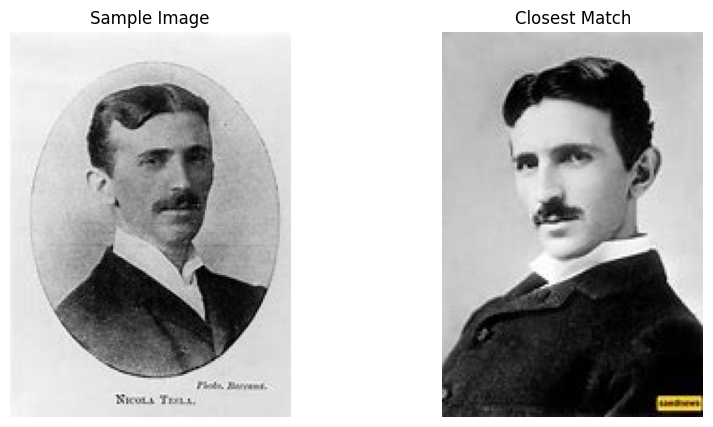

In [6]:
import os
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm  # Import tqdm for the progress bar

def compare_images(sample_image_path, images_folder_path):
    # Load the sample image
    sample_image = Image.open(sample_image_path)

    # Create a DataFrame to store results
    results = []

    # List all images in the folder
    image_files = [f for f in os.listdir(images_folder_path) if os.path.isfile(os.path.join(images_folder_path, f))]

    # Initialize tqdm for the progress bar
    for image_name in tqdm(image_files, desc="Comparing Images"):
        image_path = os.path.join(images_folder_path, image_name)
        try:
            # Compare the sample image with the current image
            result = DeepFace.represent(img_path=image_path, model_name='VGG-Face', enforce_detection=False)
            distance = DeepFace.verify(img1_path=sample_image_path, img2_path=image_path, model_name='VGG-Face', enforce_detection=False)['distance']

            # Append results to the DataFrame
            results.append({'Image': image_name, 'Distance': distance})

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Sort DataFrame by distance
    df_sorted = df.sort_values(by='Distance').reset_index(drop=True)

    # Display the results
    print("Comparison Results:")
    print(df_sorted)

    # Display the most similar image
    if not df_sorted.empty:
        closest_image = df_sorted.iloc[0]['Image']
        closest_image_path = os.path.join(images_folder_path, closest_image)
        print(f"Most similar image: {closest_image}")

        # Display the input and closest images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Sample Image")
        plt.imshow(sample_image)
        plt.axis('off')

        closest_image = Image.open(closest_image_path)
        plt.subplot(1, 2, 2)
        plt.title("Closest Match")
        plt.imshow(closest_image)
        plt.axis('off')

        plt.show()

# Example usage
sample_image_path = '/testtesla.jpg'
images_folder_path = '/albert'

compare_images(sample_image_path, images_folder_path)


progress bar

ddd